### **Step 1 = Import dataset, libreries, check data type, size of dataset, null values and statistical summaries**

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# import all libraires
import pandas as panda
import numpy as npy
import seaborn as sean
import matplotlib.pyplot as matplot
%matplotlib inline
sean.set(color_codes=True)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [26]:
# read dataset here
df=panda.read_csv("/content/drive/My Drive/data.csv")
# print first 10 lines of dataset
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [27]:
# print last 5 lines of dataset
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [28]:
# for getting information about data types and null vlaues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [29]:
# give us statistical summaries of dataset
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [30]:
# give the size of dataset (columns,rows)
df.shape

(11914, 16)

In [31]:
#null values in dataset
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [32]:
#find null value for a specific category
df["Engine HP"].isnull().sum()

69

### **Step 2 = Drop that column which have less relevance**

In [33]:
#drop market category column
df=df.drop(['Market Category','Number of Doors'], axis=1)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [34]:
#after dropping get all info of dataset
df.shape

(11914, 14)

In [35]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg',
       'Popularity', 'MSRP'],
      dtype='object')

In [36]:
#find null values in dataset for every columns
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Vehicle Size       11914 non-null  object 
 9   Vehicle Style      11914 non-null  object 
 10  highway MPG        11914 non-null  int64  
 11  city mpg           11914 non-null  int64  
 12  Popularity         11914 non-null  int64  
 13  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


### **Step 3 = Rename given columns**

In [38]:
df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission",
                    "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"},inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [39]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'HP', 'Cylinders',
       'Transmission', 'Drive Mode', 'Vehicle Size', 'Vehicle Style', 'MPG-H',
       'MPG-C', 'Popularity', 'Price'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  object 
 1   Model             11914 non-null  object 
 2   Year              11914 non-null  int64  
 3   Engine Fuel Type  11911 non-null  object 
 4   HP                11845 non-null  float64
 5   Cylinders         11884 non-null  float64
 6   Transmission      11914 non-null  object 
 7   Drive Mode        11914 non-null  object 
 8   Vehicle Size      11914 non-null  object 
 9   Vehicle Style     11914 non-null  object 
 10  MPG-H             11914 non-null  int64  
 11  MPG-C             11914 non-null  int64  
 12  Popularity        11914 non-null  int64  
 13  Price             11914 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


### **Step 4 = Check for any duplicates, null values and missing data and remove them**

In [41]:
#find null values in data and remove them
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11813 non-null  object 
 1   Model             11813 non-null  object 
 2   Year              11813 non-null  int64  
 3   Engine Fuel Type  11813 non-null  object 
 4   HP                11813 non-null  float64
 5   Cylinders         11813 non-null  float64
 6   Transmission      11813 non-null  object 
 7   Drive Mode        11813 non-null  object 
 8   Vehicle Size      11813 non-null  object 
 9   Vehicle Style     11813 non-null  object 
 10  MPG-H             11813 non-null  int64  
 11  MPG-C             11813 non-null  int64  
 12  Popularity        11813 non-null  int64  
 13  Price             11813 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.4+ MB


In [42]:
#find total duplicates in dataset
df.duplicated().sum()

721

In [43]:
#remove all duplicates
df.drop_duplicates(keep=False,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10470 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              10470 non-null  object 
 1   Model             10470 non-null  object 
 2   Year              10470 non-null  int64  
 3   Engine Fuel Type  10470 non-null  object 
 4   HP                10470 non-null  float64
 5   Cylinders         10470 non-null  float64
 6   Transmission      10470 non-null  object 
 7   Drive Mode        10470 non-null  object 
 8   Vehicle Size      10470 non-null  object 
 9   Vehicle Style     10470 non-null  object 
 10  MPG-H             10470 non-null  int64  
 11  MPG-C             10470 non-null  int64  
 12  Popularity        10470 non-null  int64  
 13  Price             10470 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


In [44]:
#null values in data set
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [45]:
#rows and columns after removing duplicates
df.shape

(10470, 14)

### **Step 5 = Plot graphs of various columns to check for outliers and remove those data points from the dataset**

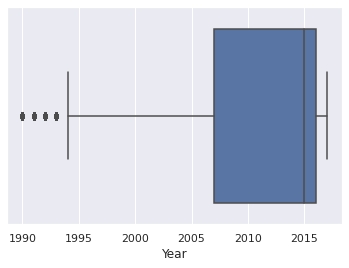

In [46]:
#Boxplot of different columns
sean.boxplot(x=df["Year"])

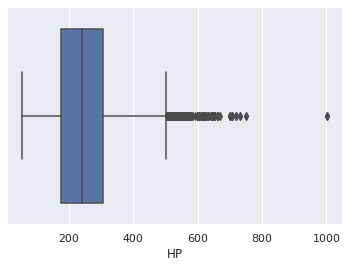

In [47]:
sean.boxplot(x=df["HP"])

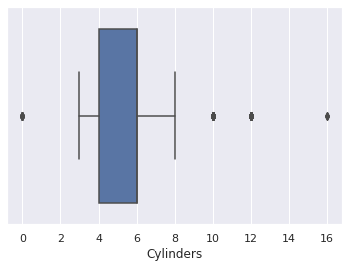

In [48]:
sean.boxplot(x=df["Cylinders"])

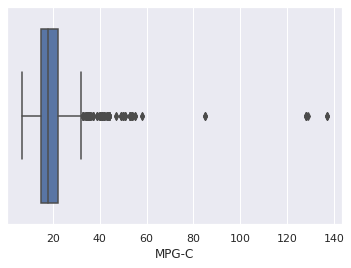

In [49]:
sean.boxplot(x=df["MPG-C"])

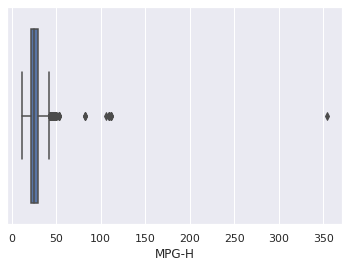

In [50]:
sean.boxplot(x=df["MPG-H"])

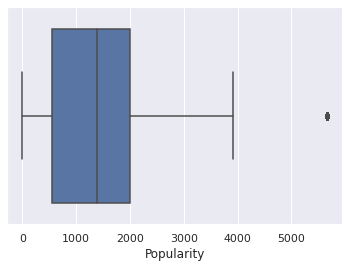

In [51]:
sean.boxplot(x=df["Popularity"])

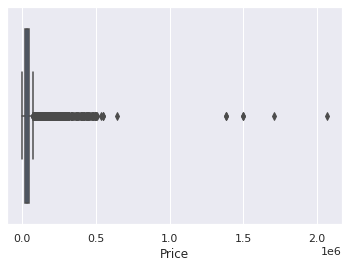

In [52]:
sean.boxplot(x=df["Price"])

In [53]:
#Remove all outliers in the boxplot
q1=df.quantile(0.25)
q2=df.quantile(0.75)
iqr=q2-q1
print(iqr)

Year              9.0
HP              131.0
Cylinders         2.0
MPG-H             8.0
MPG-C             7.0
Popularity     1460.0
Price         21822.5
dtype: float64


In [54]:
#Check number of outliers in boxplot of different columns before removing them
( (df<(q1-(1.5*iqr))) | (df>(q2+(1.5*iqr))) ).sum()

Cylinders           304
Drive Mode            0
Engine Fuel Type      0
HP                  478
MPG-C               217
MPG-H               119
Make                  0
Model                 0
Popularity          765
Price               916
Transmission          0
Vehicle Size          0
Vehicle Style         0
Year                343
dtype: int64

In [55]:
df=df[~( (df<(q1-(1.5*iqr))) | (df>(q2+(1.5*iqr))) ).any(axis=1)]

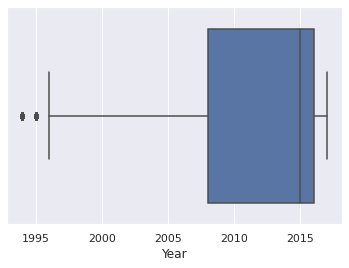

In [56]:
#Boxplot of different columns after removing the outliers
sean.boxplot(x=df["Year"])

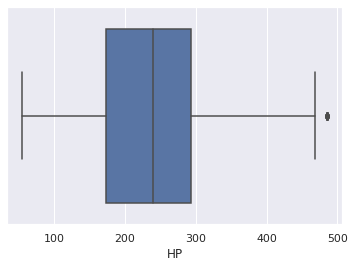

In [57]:
sean.boxplot(x=df["HP"])

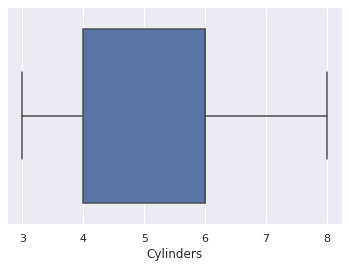

In [58]:
sean.boxplot(x=df["Cylinders"])

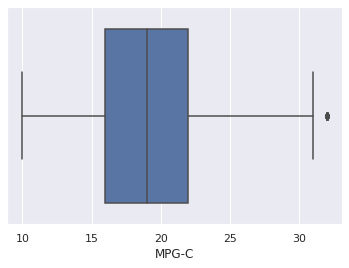

In [59]:
sean.boxplot(x=df["MPG-C"])

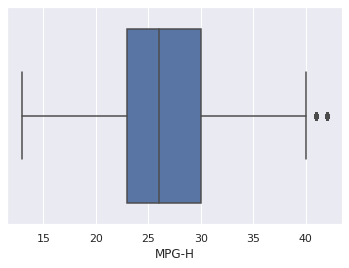

In [60]:
sean.boxplot(x=df["MPG-H"])

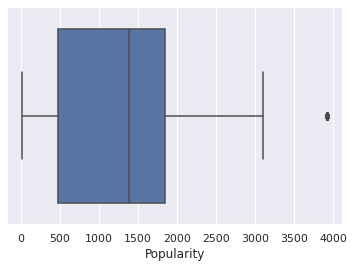

In [61]:
sean.boxplot(x=df["Popularity"])

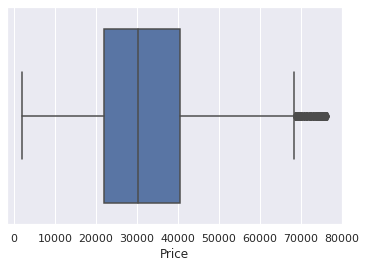

In [62]:
sean.boxplot(x=df["Price"])

In [63]:
#Check number of outliers in boxplot of different columns after removing them
( (df<(q1-(1.5*iqr))) | (df>(q2+(1.5*iqr))) ).sum()

Cylinders           0
Drive Mode          0
Engine Fuel Type    0
HP                  0
MPG-C               0
MPG-H               0
Make                0
Model               0
Popularity          0
Price               0
Transmission        0
Vehicle Size        0
Vehicle Style       0
Year                0
dtype: int64

### **Step 6 = Find the car brands are the most represented in the dataset and average price among the top car brands**

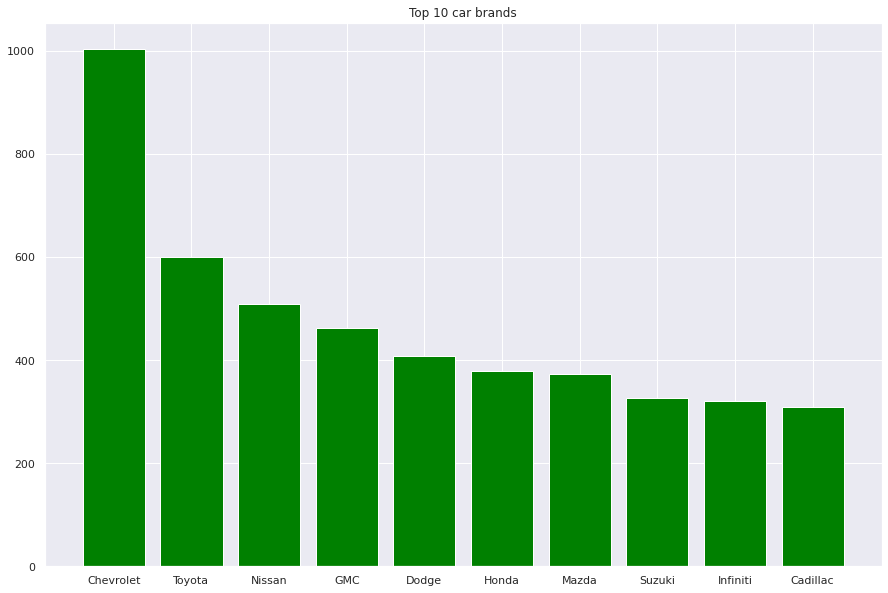

In [64]:
#Count numbers of top 10 cars per brand
counts=df["Make"].value_counts()

#Top 10 car brands
popularcars=counts.index[:10]

#Plot bar graph of top 10 cars brand
matplot.figure(figsize=(15,10))
matplot.bar(popularcars,height=counts[:10],color="Green")
matplot.title("Top 10 car brands")
matplot.show()

In [65]:
#Average price among the top 10 car brands
prices=df[["Make","Price"]].loc[(df["Make"]=="Chervolet") | (df["Make"]=="Ford") | (df["Make"]=="Toyota") |
                                (df["Make"]=="Nissan") | (df["Make"]=="GMC") | (df["Make"]=="Dodge") | 
                                (df["Make"]=="Honda") | (df["Make"]=="Cadillac") | (df["Make"]=="Mazda") |
                                (df["Make"]=="Volkswagen")].groupby("Make").mean()
#Print average price of top 10 car brands
print (prices)

                   Price
Make                    
Cadillac    50509.370130
Dodge       26178.358722
GMC         33666.516199
Honda       27038.467018
Mazda       20628.445040
Nissan      28559.636542
Toyota      28759.360000
Volkswagen  30449.461017


### **Step 7 = Plot the correlation matrix and documents your insights**

**7(a) = Plot the correlation matrix**

In [66]:
#Correlation matrix
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.329259,-0.085730,0.357681,0.319505,0.208509,0.579331
HP,0.329259,1.000000,0.745470,-0.464840,-0.564341,0.099750,0.746944
Cylinders,-0.085730,0.745470,1.000000,-0.690858,-0.744093,0.019341,0.405795
MPG-H,0.357681,-0.464840,-0.690858,1.000000,0.937103,0.095116,-0.134963
MPG-C,0.319505,-0.564341,-0.744093,0.937103,1.000000,0.084180,-0.211754
Popularity,0.208509,0.099750,0.019341,0.095116,0.084180,1.000000,0.114641
Price,0.579331,0.746944,0.405795,-0.134963,-0.211754,0.114641,1.000000


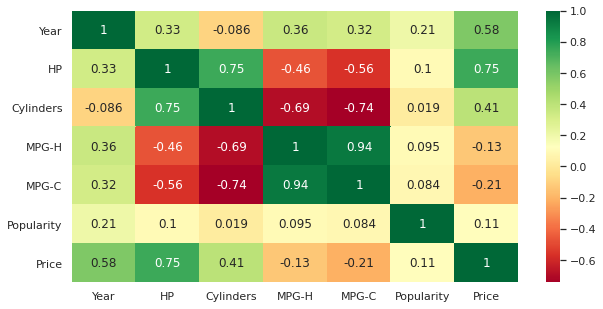

In [67]:
#Plot heatmap for different columns
matplot.figure(figsize=(10,5))
corrmatrix=df.corr()
sean.heatmap(corrmatrix,cmap="RdYlGn",annot=True)

**7(b) = Documents your insights (Using heatmap plotted)**

1. **We conclude that HP and Cylinders both are correlated positively with each other**

2. **Price is correlated with Year and HP positively**

3. **MPG-C and MPG-H both have very less correlation in each other**

4. **MPG-C and MPG-H both have strong negitive correlation with Cylinders**

5. **Popularity is not correlated with anything**

### **Step 8 = Perform EDA and plot different graphs and document your findings**

**8(a) = Scatter plot graphs of different variables versus price**

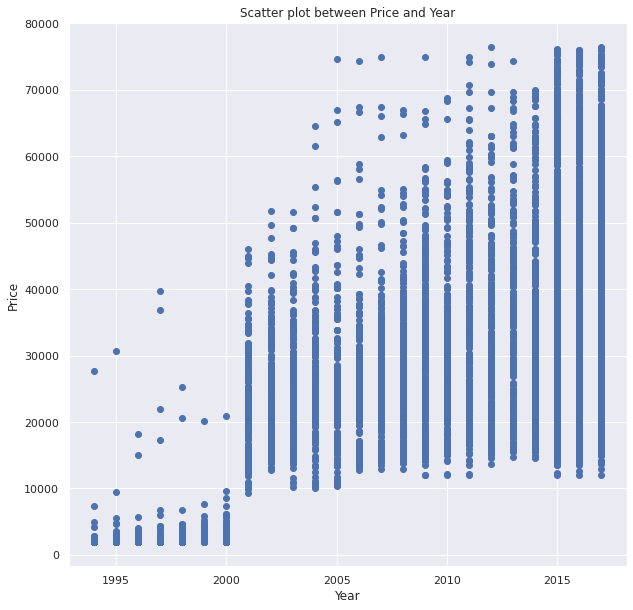

In [68]:
#Graph between Price and Year
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(df["Year"], df["Price"])
matplot.title("Scatter plot between Price and Year")
axis.set_xlabel("Year")
axis.set_ylabel("Price")
matplot.show()

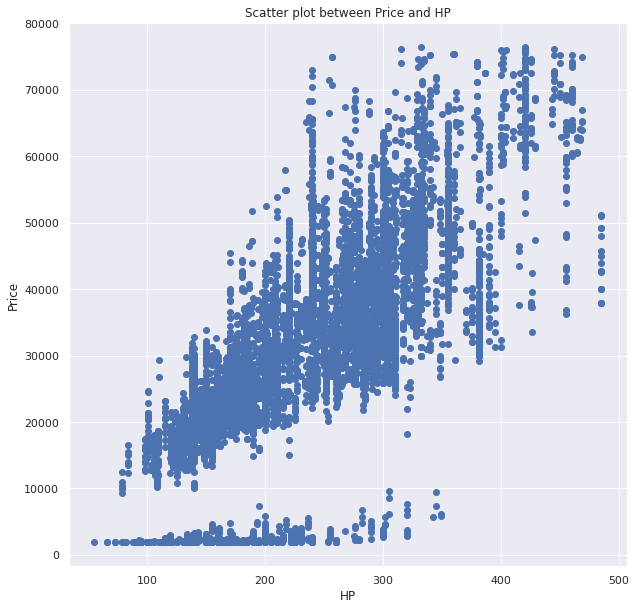

In [69]:
#Graph between Price and HP
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(df["HP"], df["Price"])
matplot.title("Scatter plot between Price and HP")
axis.set_xlabel("HP")
axis.set_ylabel("Price")
matplot.show()

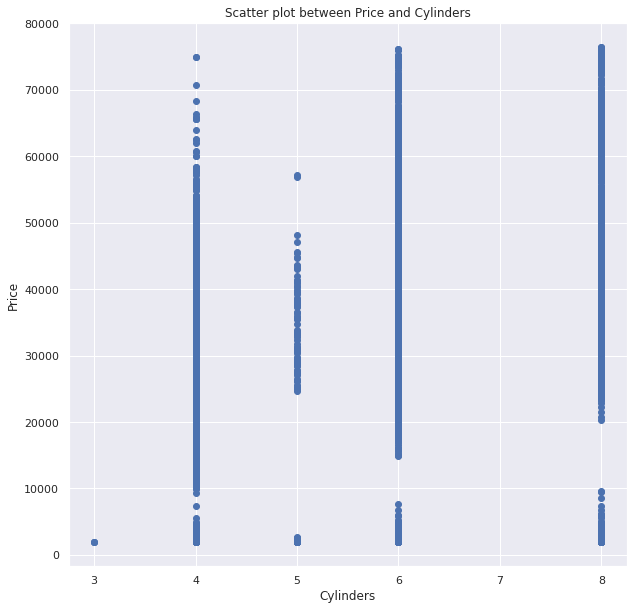

In [70]:
#Price between Price and value of Cylinders
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(df["Cylinders"], df["Price"])
matplot.title("Scatter plot between Price and Cylinders")
axis.set_xlabel("Cylinders")
axis.set_ylabel("Price")
matplot.show()

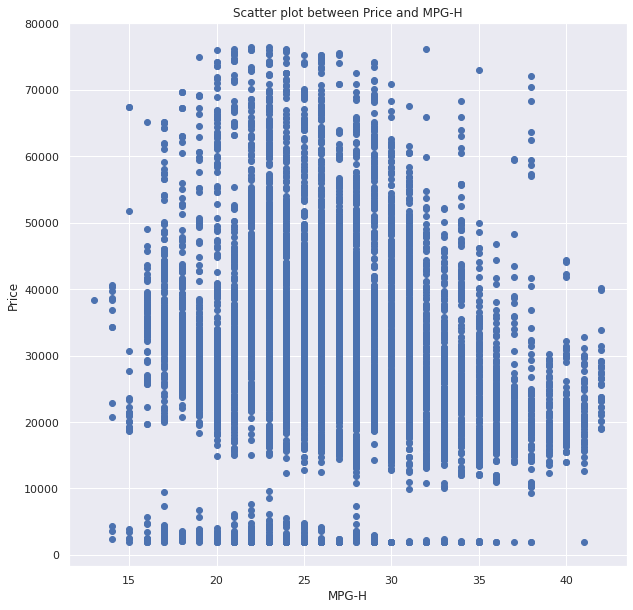

In [71]:
#Graph between Price and MPG-H
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(df["MPG-H"], df["Price"])
matplot.title("Scatter plot between Price and MPG-H")
axis.set_xlabel("MPG-H")
axis.set_ylabel("Price")
matplot.show()

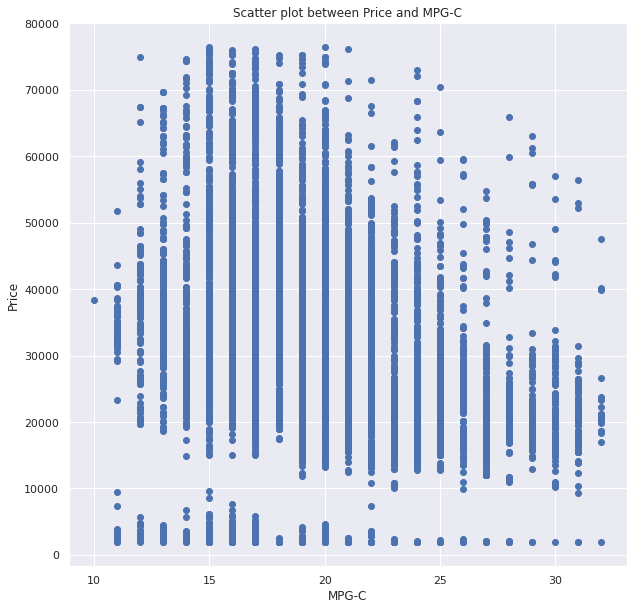

In [72]:
#Graph between Price and MPG-C
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(df["MPG-C"], df["Price"])
matplot.title("Scatter plot between Price and MPG-C")
axis.set_xlabel("MPG-C")
axis.set_ylabel("Price")
matplot.show()

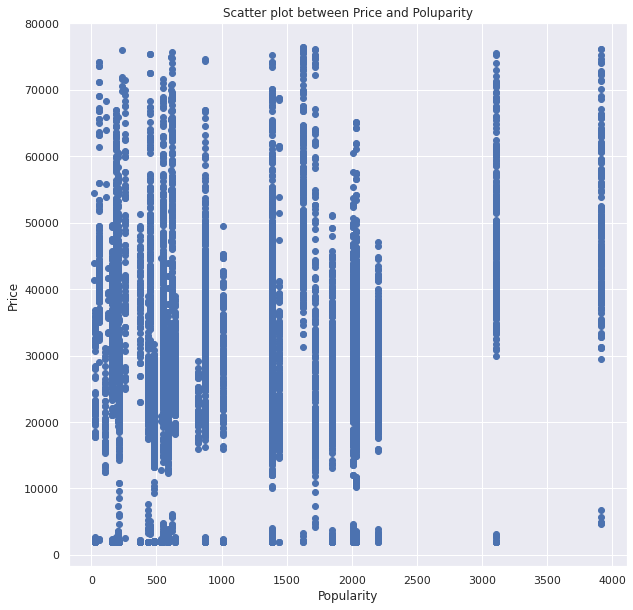

In [73]:
#Graph between Price and Popularity
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(df["Popularity"], df["Price"])
matplot.title("Scatter plot between Price and Poluparity")
axis.set_xlabel("Popularity")
axis.set_ylabel("Price")
matplot.show()

**8(b) = Conclusion after plotting different graphs**

1. **After plotting graph between Year and Price we conclude that as Year increase Price also increase**

2. **As value of HP insrease Price will also increase**

3. **Price will decrease with the value of MPG-H and MPG-C**

4. **Popularity is not effecting the Price**

### **Step 9 = Split the dataset into 80 and 20 ratio and build a machine learning model with Price as the target variable**

In [74]:
x = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [75]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [76]:
#Splitting the dataset into the training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [77]:
#Fitting multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

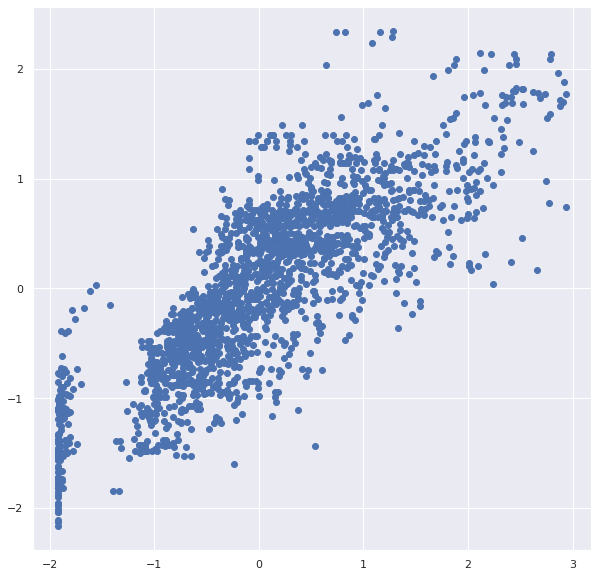

In [78]:
#Predicting the test set results
y_pred = regressor.predict(x_test)
matplot.figure(figsize=(10,10))
matplot.scatter(y_test,y_pred)

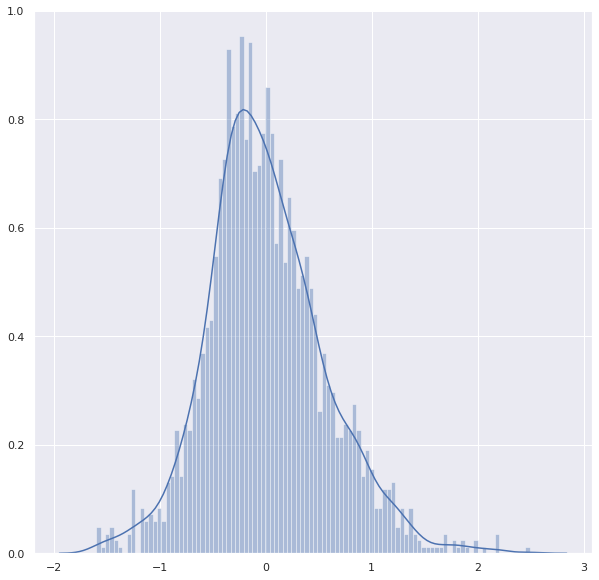

In [79]:
matplot.figure(figsize=(10,10))
sean.distplot((y_test-y_pred),bins=100)

In [80]:
#Finding the value of MAE, RMSE and R-Square
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.42672578412126283
Root Mean Squared Error: 0.5538037917381192
R2 Score: 0.6785482625982548


### **Step 10 = Perform different algorithms and check their performance over metrics like R-Square, RMSE, MAE**

1. **Polynomial Ragression**

In [81]:
#Input polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

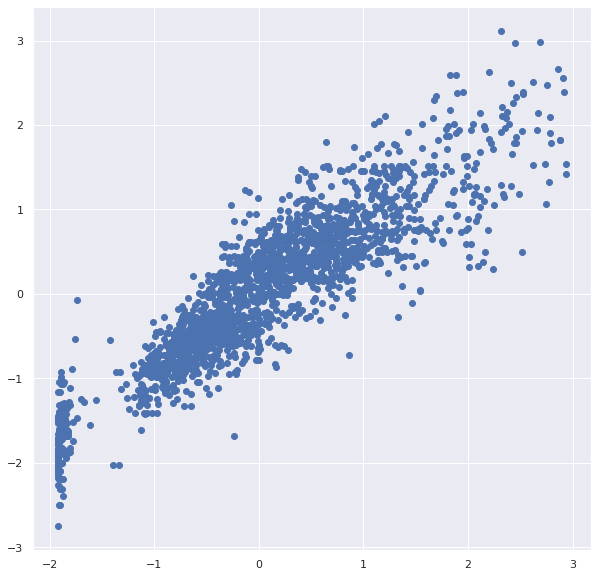

In [82]:
#Predicting a new result using polynomial regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))
matplot.figure(figsize=(10,10))
matplot.scatter(y_test,y_pred)

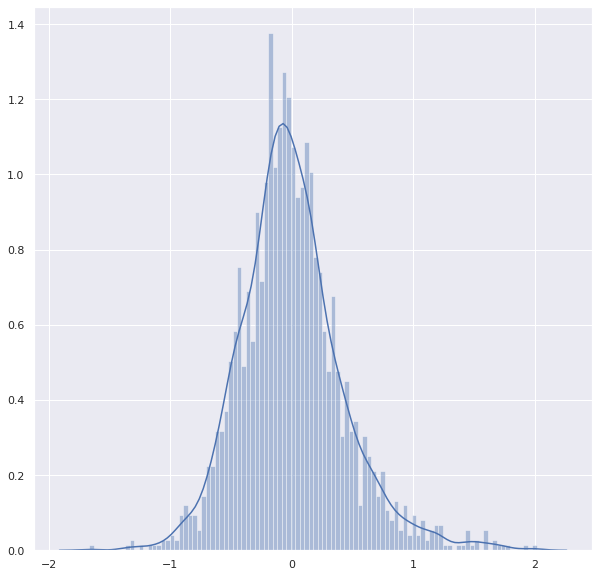

In [83]:
matplot.figure(figsize=(10,10))
sean.distplot((y_test-y_pred),bins=100)

In [84]:
#Finding the value of MAE, RMSE and R-Square
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3187818810840435
Root Mean Squared Error: 0.42669298112205484
R2 Score: 0.8091751517974815


2. **SVR**

In [85]:
#Insert SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

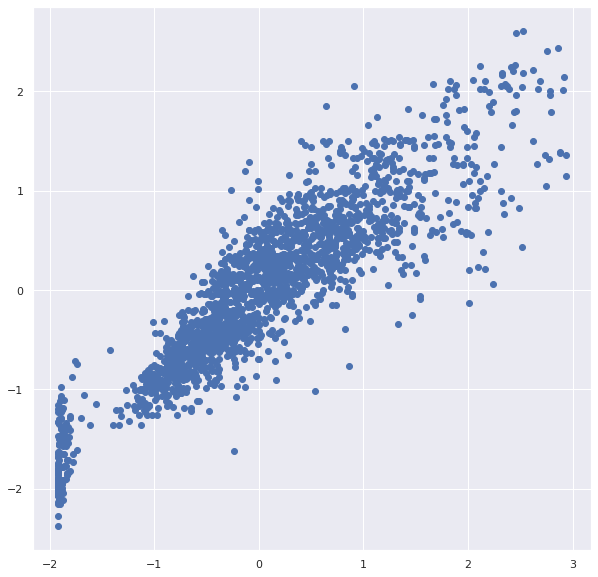

In [86]:
#Predicting a new result using SVR
y_pred = regressor.predict(x_test)
matplot.figure(figsize=(10,10))
matplot.scatter(y_test,y_pred)

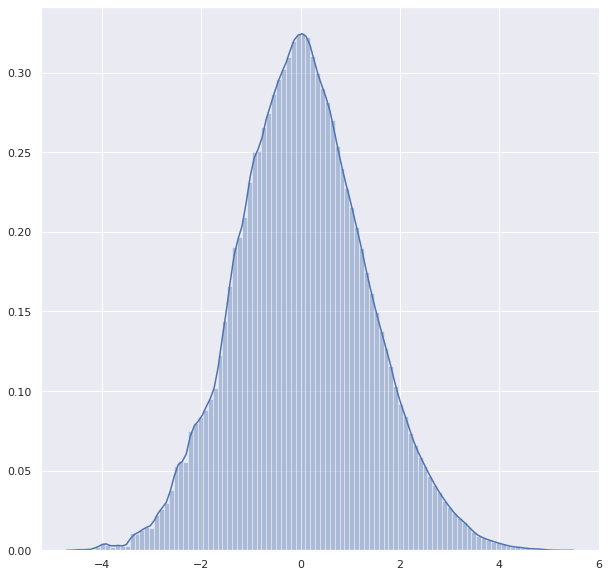

In [87]:
matplot.figure(figsize=(10,10))
sean.distplot((y_test-y_pred),bins=100)

In [88]:
#Find value MAE, RMSE and R-Square using SVR
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3041942030626726
Root Mean Squared Error: 0.4264656506365493
R2 Score: 0.8093784302734826


3. **Random Forest Regression**

In [89]:
#Input Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

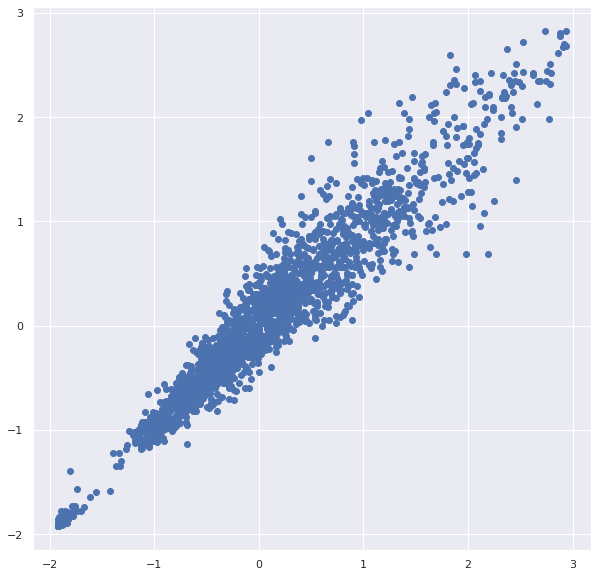

In [90]:
#Predict result using Random Forest Regression
y_pred = regressor.predict(x_test)
matplot.figure(figsize=(10,10))
matplot.scatter(y_test,y_pred)

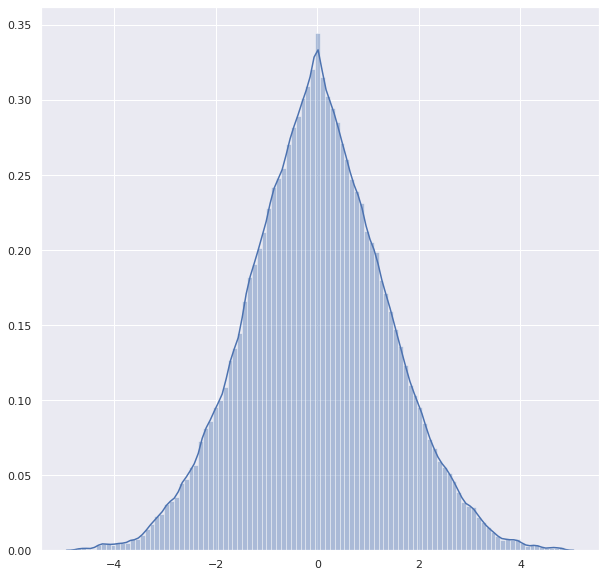

In [91]:
matplot.figure(figsize=(10,10))
sean.distplot((y_test-y_pred),bins=100)

In [92]:
#Find values of MAE, RMSE and R-Square for Random Forest Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.18408317521281137
Root Mean Squared Error: 0.25687304585334214
R2 Score: 0.9308422272364935
